In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing import image

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [3]:
# Normalize image data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
# Build CNN model
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


D:\python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Train the CNN model
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 27ms/step - accuracy: 0.3880 - loss: 1.6845
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 27ms/step - accuracy: 0.5997 - loss: 1.1339
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.6647 - loss: 0.9705
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.6915 - loss: 0.8855
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.7151 - loss: 0.8168
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.7427 - loss: 0.7450
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.7580 - loss: 0.7044
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.7699 - loss: 0.6521
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.7840 - loss: 0.6167
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.7954 - loss: 0.5794


In [6]:
# Evaluate the CNN model
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7066 - loss: 0.8999


[0.915945827960968, 0.7013999819755554]

In [7]:
# Function to preprocess a single image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

In [8]:
# Function to predict the class of a single image
def predict_image_class(model, img_path):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    return classes[predicted_class], predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Predicted class: dog


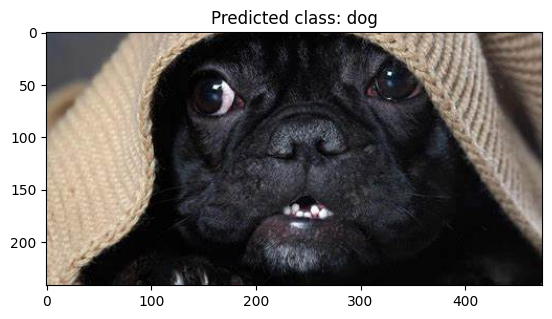

In [9]:
# Test the function with an example image
img_path = 'image3.jpg'  # Provide the path to your image
predicted_class, predictions = predict_image_class(cnn, img_path)
print(f"Predicted class: {predicted_class}")

img = image.load_img(img_path)
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class}")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted class: frog


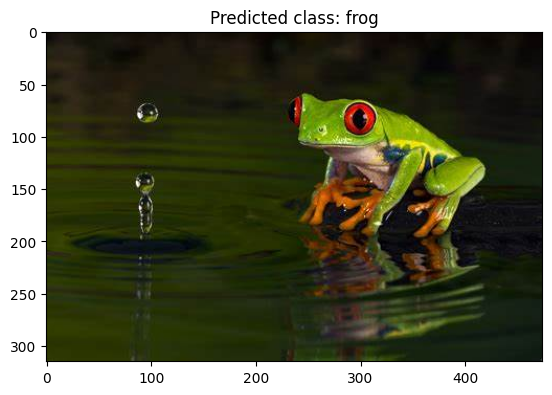

In [10]:
# Test the function with an example image
img_path = 'image2.jpg'  # Provide the path to your image
predicted_class, predictions = predict_image_class(cnn, img_path)
print(f"Predicted class: {predicted_class}")

img = image.load_img(img_path)
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class}")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted class: airplane


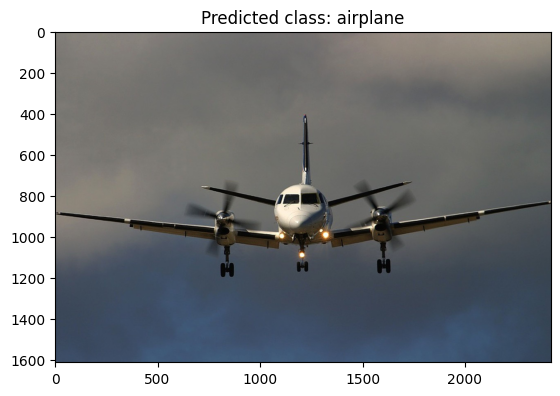

In [11]:
# Test the function with an example image
img_path = 'image1.jpeg'  # Provide the path to your image
predicted_class, predictions = predict_image_class(cnn, img_path)
print(f"Predicted class: {predicted_class}")

img = image.load_img(img_path)
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class}")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted class: airplane


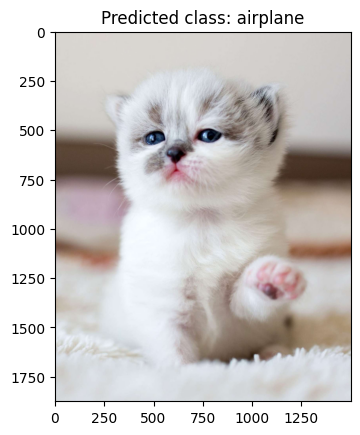

In [12]:
# Test the function with an example image
img_path = 'image4.jpg'  # Provide the path to your image
predicted_class, predictions = predict_image_class(cnn, img_path)
print(f"Predicted class: {predicted_class}")

img = image.load_img(img_path)
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class}")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted class: truck


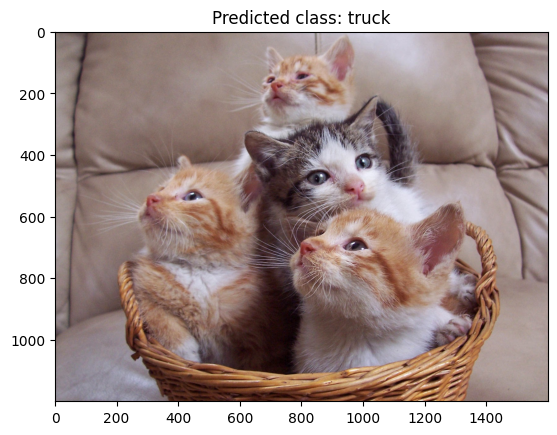

In [13]:
# Test the function with an example image
img_path = 'image6.jpg'  # Provide the path to your image
predicted_class, predictions = predict_image_class(cnn, img_path)
print(f"Predicted class: {predicted_class}")

img = image.load_img(img_path)
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class}")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted class: frog


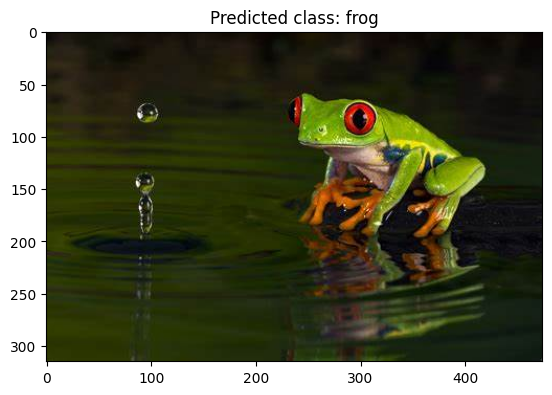

In [14]:
# Test the function with an example image
img_path = 'image2.jpg'  # Provide the path to your image
predicted_class, predictions = predict_image_class(cnn, img_path)
print(f"Predicted class: {predicted_class}")

img = image.load_img(img_path)
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class}")
plt.show()